# Data Mining: Fundamentals
## Michelangelo Leoni and Jacopo Omodei
-----

# Table of contents

[Intro](#intro)

[Data Understanding](#data_understanding)

[Data Preparation](#data_preparation)

[Data Clustering](#data_clustering)

------

# Introduction (Slides 0)

<a id="intro"></a>

What is __data mining?__ It is the use off efficient techniques for the _analysis_ of _very large collections of data_ and the _extraction_ of useful and hidden knowledge. 

__Primary data__ is original data that has been collected for a specific purpose (not altered by humans), while __secondary data__ is data that has already been collected and made available for other purposes (can come from many sources). 

## CRISP-DM:
__Cross-Industry Standard Process for Data Mining__. Reliable and repeatable data mining process in the field. 
- __Business understanding__
    - Understand what the __client wants__ to accomplish (business goals)
    - Assess the situation (resources, constraints, assumptions)
    - Determine data mining goals (how will we achieve the client's goal?)
    - Produce project plan
- __Data understanding__
    - Explore the data
        - Key attributes and their relations
        - Properties of sub-populations
        - If needed transform and prepare the data
    - Verify the quality of data (is it complete?)
    - Find outliers
    - Collect initial data (data loading, data integration from multiple sources)
    - Describe data (surface properties)
- __Data preparation__
    - Select data (which is useful?)
    - Clean data
    - Construct data (derived attributes or trasformed values)
    - Integrate data
    - Format data (without changing its meaning)
- __Modeling__
    - Select the technique (based on the data mining objective)
    - Test the model (seperate the data into training and validation to see how well the model fits the data)
    - Build the model and then assess it based on your criteria
- __Evaluation__
    - Evaluate how well the model performed on the test data (to what degree it meets the business objectives)
    -  Review the results, modifying if necessary
- __Deployment__
    - Plan deployment
        - How do we want to present our results?
        - What are our results (is it a report? A model? An algorithm?)
    - Plan monitoring and maintenance
    - Produce final report
    - Review project


------

<a id="data_understanding"></a>
# Data Understanding (slides 1)

It's fundamental to have an overall understanding of your data. We need to gain insight on your data with respect to our project goals and to understand the data's fundamental properties. For example, what kind of attributes do we have, and how are they correlated? How is the quality of the data? How are missing values handled? Do we need to extract other attributes? etc.

## Data
What is data? A collection of data objects and their attributes. An __attribute__ (_variable, field, characteristic, dimention, feature_) is a property or charactetristic of an object (while an __object__ (_record, point, case, sample, entity, instance_)is defined as a collection of attributes)

### Types of data: 
- __Record:__
    - Data matrix (table)
        - Objects have the same fixed set of attributes
        - Objects are points in a fixed dimention multi-dim space
    - Document data  <img align="right" width="250" src="figures/document_data.png">
        - Each term (word or phrase) is an attribute of the vector
        - The value of each attribute is the number of times the corresponding term occurs in the document
    - Transaction data (each record is a transaction that involves a set of items)
- __Graph:__ (directionally connected nodes)
  - Examples: World Wide Web, molecular structures, social networks
- __Ordered:__
    - Spatial-temporal data
    - Sequential data
    - Genetic sequence data  

### Types of attributes:
- __Nominal/categorical:__ attribute values in a finite domain, categories
    - Ex: ID numbers, eye color, zip codes
- __Binary:__ _nominal attribute_ with only two states (0 and 1)
    - Symmetric binary: 0/1 equally important (ex: gender)
    - Asymmetric binary: 1 is the presence of something (important) while 0 is the absence
- __Ordinal:__ finite domain with meaningful ordering on the domain
    - Ex: Rankings, grades, height
- __Numeric:__ quantity (integer or real-valued)
    - Interval-scaled: measured on a scale of equal-sized units, and the values have order. Example: calendar dates, temperature in C
- __Ratio-scaled:__ values being an order of magnitude larger than the unit of measurement
    - Ex: length, counts, elapsed time. (A game lasting 3 hours is _50% longer_ than a game lasting 2 hours)  

### Data quality:
Naturally, bad data can lead to incorrect conclusions and is to be avoided if possible. Some possible data quality issues can be:
- __Syntatctic accuracy:__ entry not in the domain
    - Ex: text in numerical attributes, typos
- __Semantic accuracy:__ data is in the domain but not correct
    - Ex: John Smith classified as female (though is male). Needs more information to be checked (you may not catch that J.S is a male, though you could catch a negative value in a defined-positive attribute)
- __Completeness__
- __Unbalanced data:__ data is biased to one type of record
- __Timeliness:__ is the data up to date?
- __Duplicate data:__ duplicates or almost duplicates (like merging from heterogeneous sources)
    - Ex: one person with multiple email addresses

### Data visualization:
Different types of statistical tools and charts may be used to best convey the patterns in the data. For example, scatterplots, bar charts, or __histograms__. The number of bins in a histogram is a fundamental parameter that drastically can change the usefulness of the presented data. The number of bins according to __Sturges' rule__ is \$k=\left[\log_2{(n)}+1\right]\$ where _n_ is the sample size. This rule is useful for normal distributions and moderately-sized datasets.

You can then use this number of bins to set _k_ equally-sized bins in the interval, or to create _k_ equally populated (but differently-sized) bins in the interval. There are also different binning practices, but these are the most common (and the first one is the most widely-used).

Data can be distributed in all sorts of ways, for example data can be __symmetric__, __bimodal__ (presenting two clear peaks), __positively skewed__ (with a long positive tail mean>mode), or __negatively skewed__ (long negative tail mean<mode)

<img align="right" width="110" src="figures/box_whisker.png">

__Box plot:__ five-number summary of a distribution. 
The data is represented with a box whose edges are the first and third quartiles (25% and 75%, respectively). The middle of the box (marked with a line) is the second quartile (50%, median). The whiskers (two lines out from the box) extend to the 1st, 5th or 10th percentile (depends on the convention) and 99th, 95th, 90th percentile respectively. Any points beyond the whiskers are outliers. 
In general, the p%-quartile is the value of _x_ so that p% of the values are smaller 

What box plots lack is the distribution of the data (two datasets can have the same quartiles but different distributions). Histograms instead are perfect for showing these further patterns.

__Scatter plots:__ can be useful to see clusters of points, outliers and correlations. They are limited by the fact that in higher dimensions they quickly become illeggible and sparse. However, to plot bivariate data (one attribute vs another) they can be quite useful. As shown in the figure, you can use scatterplot matrices to plot every attribute vs every other attribute in a dataset. 

<img align="center" width="200" src="figures/scatter_matrix.png">


__Radar plot:__ Coordinates are drawn in a star-like fashion, with each tip of the star being an attribute. Each pattern is a polygon within this space extending outwards for higher values of the attribute.

<img align="center" width="200" src="figures/radarplot.png">

### Correlation:
The sample __Pearson's correlation coefficient__ is a measure for a linear relationship between two numerical attributes X and Y and is defined as \$r_{xy} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{(n-1)s_xs_y};\$ \$r_{xy}\in[-1,1]\$
where \$\bar{x},\bar{y}\$ are the mean values of X and Y, and \$s_x,s_y\$ are the corresponding sample standard deviations.

The larger the absolute value of the Pearson correlation coefficient, the stronger the linear relationship between the two attributes. For maximum correlation \$|r_{xy}|=1\$ and the values of X and Y line on a line. Positive (negative) correlation indicates a line with positive (negative) slope. 


### Outliers:
Outliers can be very annoying or very interesting. They can be because of noise, and effectively harmful for the data (potentially look to exclude them) or they can be the very case of our study (the verification of a rare but desired event). Outliers can be detected by looking at their frequency (low histogram count), numerical attribute (outside the whiskers in the box plot), they can be outliers with respect to one or more attributes (seen in scatter plots), and can also be found through cluster analysis. 

Oftentimes it is still useful to exlude correct (not born from noise but from rare events) outliers in our analysis, noting the fact that we have done so.



-------

<a id="data_preparation"></a>
# Data Preparation (slides 2)




-------

<a id="data_clustering"></a>
# Data clustering


## K-mean clustering

Each cluster is associated with a centroid, and each data point is assigned to the cluster with the closest centroid.
A typical K-Means clustering algorithm works as follows:

- Select K random points as the initial centroids.
- Repeat until the centroids no longer change:
    - Assign each data point to the cluster with the closest centroid.
    - Compute the mean of each cluster.
    - Update the centroids to the newly computed means.

Cluster then pca ok viceersa no

computing ...


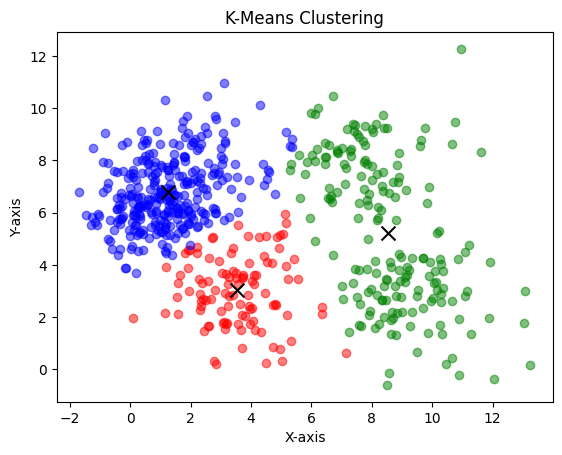

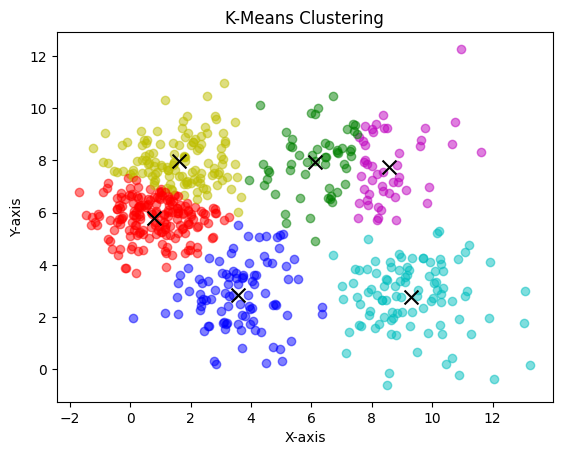

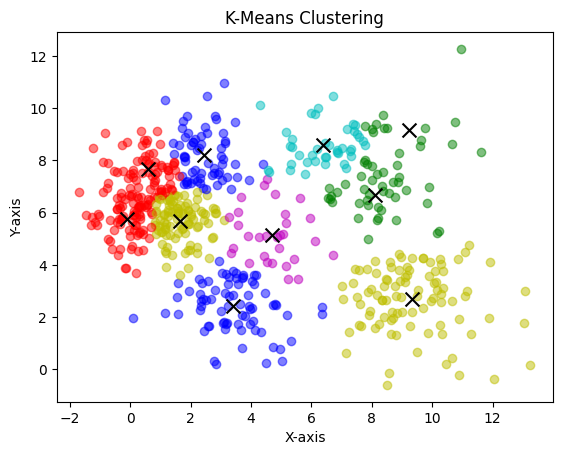

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class Point:
    """A point in 2D space with methods to generate random coordinates and assign to clusters."""

    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.dist = np.inf

    def random_normal(self, mean_x, mean_y, sigma):
        self.x = np.random.normal(mean_x, sigma)
        self.y = np.random.normal(mean_y, sigma)

    def random_uniform(self, low, high):
        self.x = np.random.uniform(low, high, 1)
        self.y = np.random.uniform(low, high, 1)

    def belongs_to(self, cluster_id, dist):
        self.cluster_id = cluster_id
        self.dist = dist


def generate_points_normal(points_per_cluster=100, mean_x=np.random.randint(0, 10), mean_y=np.random.randint(0, 10), sigma=0.1):
    points = []
    for _ in range(points_per_cluster):
        p = Point(0, 0)
        p.random_normal(mean_x, mean_y, sigma)
        points.append(p)
        
    return points

def generate_clustered_data(num_clusters=3, points_per_cluster=100):
    all_points = []
    for _ in range(num_clusters):
        cluster_points = generate_points_normal(points_per_cluster, mean_x=np.random.uniform(0, 10), mean_y=np.random.uniform(0, 10), sigma=np.random.uniform(1.0, 1.5))
        all_points.extend(cluster_points)

    return all_points

def k_means_alg(points, k, max_iters=5):

    #randomly initialize centroids
    centroids = [Point(points[i].x, points[i].y) for i in np.random.choice(len(points), k, replace=False)]

    for _ in range(max_iters):
        #assign each point to a cluster based on the closest centroid
        for point in points:
            point.dist = np.inf
            for centroid_id in range(k):
                dist = np.sqrt((point.x - centroids[centroid_id].x) ** 2 + (point.y - centroids[centroid_id].y) ** 2)
                if (dist < point.dist):
                    point.belongs_to(centroid_id, dist)

        #compute the mean of each cluster to update centroids
        for centroid_id in range(k):
            cluster_points = [p for p in points if p.cluster_id == centroid_id]
            if cluster_points:
                mean_x = np.mean([p.x for p in cluster_points])
                mean_y = np.mean([p.y for p in cluster_points])
                centroids[centroid_id] = Point(mean_x, mean_y)

    return centroids

def plot_clusters(points, centroids):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for point in points:
        plt.scatter(point.x, point.y, color=colors[point.cluster_id % len(colors)], alpha=0.5)

    for idx, centroid in enumerate(centroids):
        plt.scatter(centroid.x, centroid.y, color='k', marker='x', s=100, label=f'Centroid {idx}')

    plt.title('K-Means Clustering')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

if __name__ == "__main__":
    num_clusters = 6
    points_per_cluster = 100
    print("computing ...")
    points = generate_clustered_data(num_clusters, points_per_cluster)
    centroids = k_means_alg(points, k=3, max_iters=10)
    plot_clusters(points, centroids)
    centroids = k_means_alg(points, k=6, max_iters=10)
    plot_clusters(points, centroids)
    centroids = k_means_alg(points, k=10, max_iters=10)
    plot_clusters(points, centroids)